# 1.0 Credit Card Fraud Identification

## Defining the question

### Specifying the Question

Enable credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Metric for success
- Accurate identification of 95% of fraudulent transactions before they are authorized
- Precision metric. Proposed as response label is imbalanced

### Understanding the context

Year in year out, we have heard of horror stories of bank and credit customer's money lost through credit fraud. This has been a paid to both banking and credit insititutions as well as customers.

Despite massive investments by insititutions in systems and customer education, credit card fraud still continues as fraudsters are able to change their patterns to avoid rule based systems detection. Therebeing, supervised methods of fraud detection are ill suited as patterns change over time. We therefore propose to use unsupervised which will proactively detect outliers from the norm which will most probably be the fraudlent transactions.

### Data Source
Data sourced from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 
transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all 
transactions.

It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, the original features and more background about the data are not provided 
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are:
- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Recording the experimental design

CRISP- DM methodology will be applied. Below steps will be undertaken to create the classifer.

- Business understanding - understanding the background
- Data understanding 
- Exploratory data analysis
- Feature engineering
- Data modelling
- Model interpretation

### Data relevance

### Risks
- Lack of acceptance of the model by business team due to lack of explainability in detection logic.
Mitigation: To give cost savings benefits will outweigh explainability risk.

### Constraints
- Due to confidentiality, original features and more background information about the data are not provided 
- Insufficient data - only 2 days of fraud
- Outdated data - collected in 2013. 

### Assumptions
- Currency is in euros
- Data is valid

## Libraries Importation

In [118]:
#Data Manipulation Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Modelling
from sklearn.cluster import KMeans #For creating clusters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

In [51]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13, 10)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

## Import data

In [3]:
df = pd.read_csv("creditcard.csv")

#### Observe 10 sample records

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Explore number of rows, columns, data type and data structure

In [5]:
#Columns and rows
df.shape

(284807, 31)

In [6]:
## Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# View statistical details
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Time ranges from 0 to 172,792
- Amount spent ranges from 0 to 25691 euros
- CLass ranges from 0 to 1.  1 is fraudulent and 0 is valid transaction

In [8]:
#Group by Time
df.groupby('Time')['Time'].count().sort_values(ascending=False)

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
92555.0      1
92554.0      1
92550.0      1
92548.0      1
86113.0      1
Name: Time, Length: 124592, dtype: int64

In [9]:
#Group by Time
df.groupby('Amount')['Amount'].count().sort_values(ascending=False)

Amount
1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
313.20        1
313.24        1
313.26        1
313.28        1
194.26        1
Name: Amount, Length: 32767, dtype: int64

#### Data Understanding Summary

1. Dataset has 284,807 rows and 31 columns which are already transformed and reduced using PCA. Original features not available with exception of time, amount and class.
2. All columns are numerical
3. Features

a) 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

b) 'Amount' is the transaction Amount,which can be used for cost-senstive learning.

c) 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
d)  Features 'V1-V28'  dimenstions reducing using PCA  to protect user identities and sensitive features e.g credit card.

## Exploratory Data Analysis

### Cleaning data

#### Check null records

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null records exist

#### Check duplicates

The fact that the dataset has amount, time and credit card specific details implies that there should be no duplicates.
If any are found, possibility of fraud transactions.

In [11]:
## Check duplicates
print("Duplicates are: ",df.duplicated().sum())

Duplicates are:  1081


 View Duplicates

In [12]:
df[df.duplicated()][0:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
223,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,0.158123,-1.224834,1.314398,0.304425,-0.290434,-2.014511,-0.772540,0.696610,0.017855,2.177312,-0.277406,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
1178,919.0,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,-0.110991,1.254250,0.704631,-0.967461,0.466524,-0.303979,0.094702,-0.198326,-0.124616,0.401377,0.157346,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0
1180,919.0,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,-0.037866,1.252000,0.698164,-0.995452,0.430980,-0.323729,0.073995,-0.202981,-0.156783,0.451522,-0.162378,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0
1382,1074.0,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,-1.133001,-0.529027,0.142246,-0.931195,0.923712,-0.750816,0.919012,-0.565837,0.547431,0.516124,-0.082562,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0


Some of the values above seem valid e.g row 221 and 223. In most cases, it's the time that is duplicated and other values are not. It's acceptable to have more than one transaction logged at same time.

Some values e.g row 114 and 115 at time 74 seem like real duplicates. Nevertheless, we will not drop them. An engagement with product owner to find the causes for the duplicates to advise further action.

Since this is a fraud scenario, a duplicate record is likely to be fraud case as well so it's important we don't drop the duplicates arbitrarly

#### Check Data Errors: Transactions with amount zero

In [13]:
print('Records with zero values group by class')
print(df[df['Amount']==0].groupby("Class")['Class'].count())
df[df['Amount']==0][0:10]

Records with zero values group by class
Class
0    1798
1      27
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,-0.059943,-0.508270,0.425506,0.414309,-0.698375,-1.465349,-0.119009,-0.144735,-1.332221,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,0.241979,0.144973,-0.583891,-1.595345,0.032613,0.752834,-0.094286,-0.163427,-1.111176,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,0.511284,-0.178159,0.762909,1.700923,-0.133861,0.402418,0.684668,-0.609395,-0.704277,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,-0.371622,0.859741,0.372609,-1.240185,0.998391,-0.346387,-0.391679,0.348289,0.282125,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
936,711.0,-0.431349,1.027694,2.670816,2.084787,-0.274567,0.286856,0.152110,0.200872,-0.596505,0.022224,-0.993674,0.244681,0.711846,-0.666973,-0.600267,0.480204,-0.438582,-0.119475,-0.681539,-0.057886,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0
1059,804.0,1.181697,-0.007908,-0.066845,1.532223,1.728832,4.409885,-1.138816,1.164645,-0.020578,0.554216,-0.729227,-0.010698,-0.013586,-0.272330,-0.114823,0.947451,-0.914655,0.245244,-0.469550,-0.040382,-0.139920,-0.399563,0.010200,0.992235,0.457015,-0.027924,0.045273,0.028868,0.0,0
1072,820.0,-0.937481,0.401649,1.882689,-0.362001,0.751088,-0.899262,0.880557,-0.181650,-0.211657,-0.666699,-0.343746,-0.429064,-1.325857,0.100213,-0.143886,-0.613434,0.130665,-0.988969,-0.829912,-0.056409,-0.001757,0.097379,-0.324050,0.436521,0.509674,0.454116,-0.201804,-0.175439,0.0,0
1170,912.0,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,0.453240,-0.755020,0.184041,-0.107569,-0.361091,-0.037247,0.334321,-0.129615,-0.633848,-1.199578,-0.203726,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.0,0
1526,1193.0,1.130646,0.625391,0.837987,2.506543,-0.107116,-0.245548,0.099603,-0.041457,-0.867319,0.623165,0.111591,0.503149,0.727329,0.174358,0.684883,0.293412,-0.288419,-0.952503,-1.491590,-0.153060,-0.017154,-0.014311,0.086559,0.393496,0.332062,-0.066378,0.013858,0.025382,0.0,0


1798 transactions had amount zero. 27 of these were marked as fraudulent transactions.

#### Check Data Errors: Transactions with negative amount or time

In [14]:
print("Negative Amount",df[df['Amount']<0]['Amount'].count())
print("Negative Time",df[df['Time']<0]['Time'].count())

Negative Amount 0
Negative Time 0


No transactions have negative amount

#### Outliers

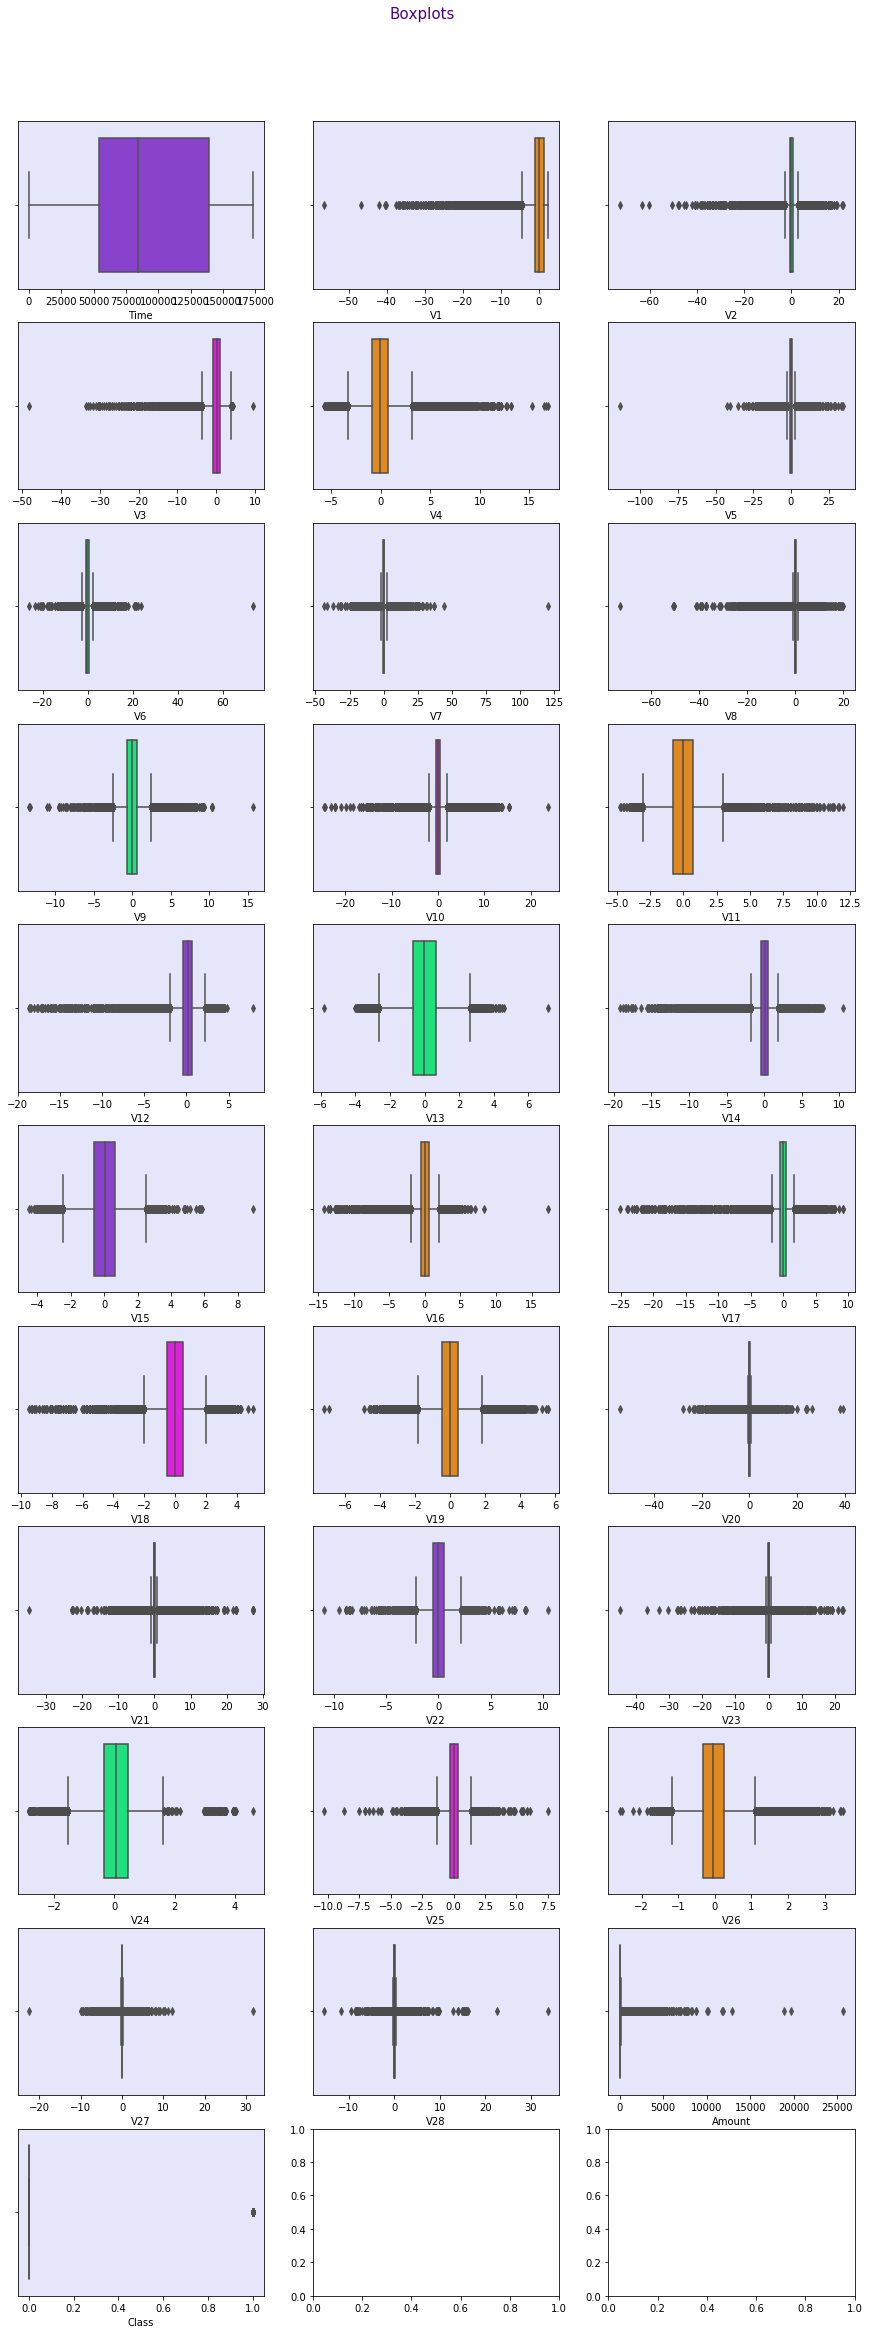

In [15]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet',
         'blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet',
         'blueviolet', 'darkorange', 'springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 11, ncols = 3, figsize = (15, 40))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

Amount has outliers from about as most of the transactions are of small amounts.

All features scaled by PCA have outliers. 

No action to be done on these as they are valid transactions

### Feature Engineering

Convert time to hours

In [60]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [62]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
89050,62402.0,-0.761702,1.229080,0.766593,-0.130789,0.069270,-0.043654,0.187701,0.670255,-0.774439,-0.612675,1.229189,0.625753,-0.088203,0.137283,0.455343,0.516796,0.097134,0.084688,-0.042221,0.004700,-0.159609,-0.552876,0.046039,-0.367835,-0.198453,0.107319,0.127229,0.018760,14.99,0,17
32744,36949.0,-0.271980,-2.286364,-1.005151,1.473186,-0.416562,0.486406,1.081217,-0.188882,-0.308682,-0.144103,0.163687,0.566156,0.521819,0.589565,0.411257,0.821506,-1.182824,0.990176,0.045621,1.562987,0.526453,-0.282385,-0.993470,-0.905163,0.528146,-0.304487,-0.138065,0.139315,809.00,0,10
224521,143841.0,2.265939,-0.528700,-2.345531,-0.921527,0.009884,-1.722901,0.299076,-0.502326,-1.109081,1.157544,0.831120,-0.696774,-1.608534,0.917588,-1.098708,0.287677,0.418397,-1.134033,1.015815,-0.177903,0.513513,1.494991,-0.204400,0.142671,0.678817,0.280572,-0.106261,-0.106948,1.79,0,15
65479,51603.0,-0.719207,0.779626,1.937894,-0.530865,0.406526,-0.340402,0.601786,0.137095,-0.912934,-0.668291,1.810529,1.283245,0.734410,0.173485,-0.059466,0.289038,-0.576193,-0.568215,-0.791468,-0.045766,-0.114895,-0.448577,-0.091192,0.223174,0.191762,0.015543,-0.066244,-0.035279,1.29,0,14
160595,113482.0,-1.269638,0.820937,0.202775,-0.660703,0.605841,-1.273238,0.856143,-0.247667,0.478743,0.386734,-0.906034,-0.025944,-0.213068,-0.101032,-0.219990,-0.065056,-0.451489,-0.770925,-0.058997,-0.089941,-0.448249,-0.776603,0.213749,-0.038256,0.185801,0.230292,0.221616,0.141157,0.89,0,7


### Univariate Analysis

#### Time and Amount distribution

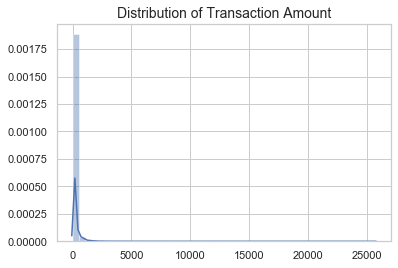

In [190]:
sns.distplot(df['Amount'].values,  color='b')
plt.title('Distribution of Transaction Amount', fontsize=14)

plt.show()

#### Class Distribution

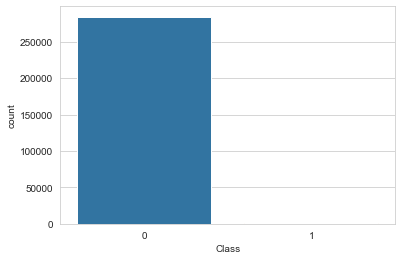

In [18]:
sns.set_style('whitegrid')
sns.countplot(df['Class'])
plt.show()

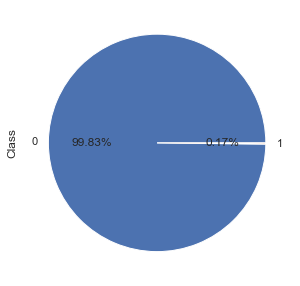

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


In [53]:
# Pie chart to display class values
sns.set_style('whitegrid')
df['Class'].value_counts().plot(kind='pie', subplots=True, figsize=(10, 5), autopct='%1.2f%%')
plt.show()
d = df.Class.value_counts()


# calculating the total percentage of our transactions
imbal = df['Class'].value_counts().to_frame().reset_index()
imbal['percent'] = imbal["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
imbal = imbal.rename(columns = {"index" : "Target", "Class" : "Count"})
imbal

The target label feature i.e 'Class' is highly imbalanced. Only 0.17% i.e 492 transactions are fraudlent. 99.8% i.e 284,315 are valid transactions

## Bivariate Analysis

#### Fraud transactions per hour

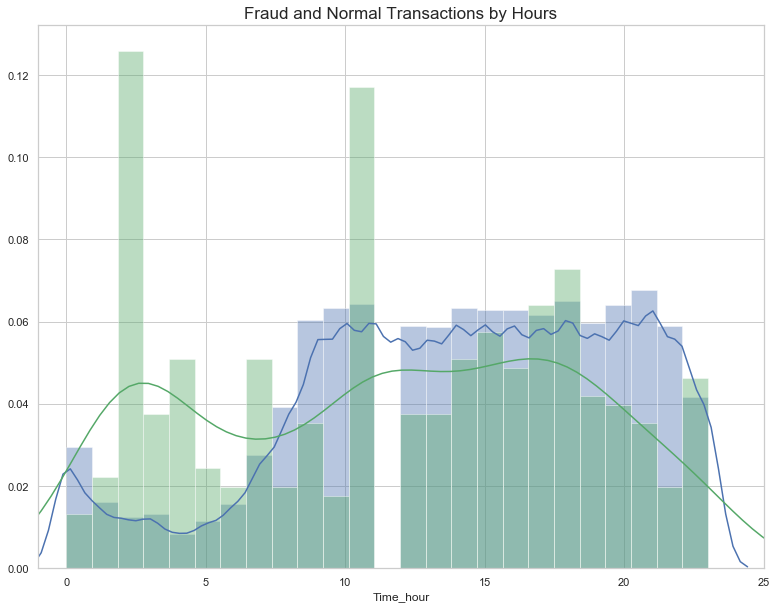

In [66]:
# Plotting our transactions per hour
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='b',bins =25)
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='g',bins =25)
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

- There are fraud transactions noted at night with 2 a.m being a peak.
- At 11 a.m there was also a high fraudulent transactions.
- Midday no fraud noted which is interesting. Is it a missing data scenario?
- Afternoon  fraud picks up before reducing at night.

In summary, fraud transactions are perpetuated throughout the day

#### Transaction Amounts per Fraud or Not Fraud Classes

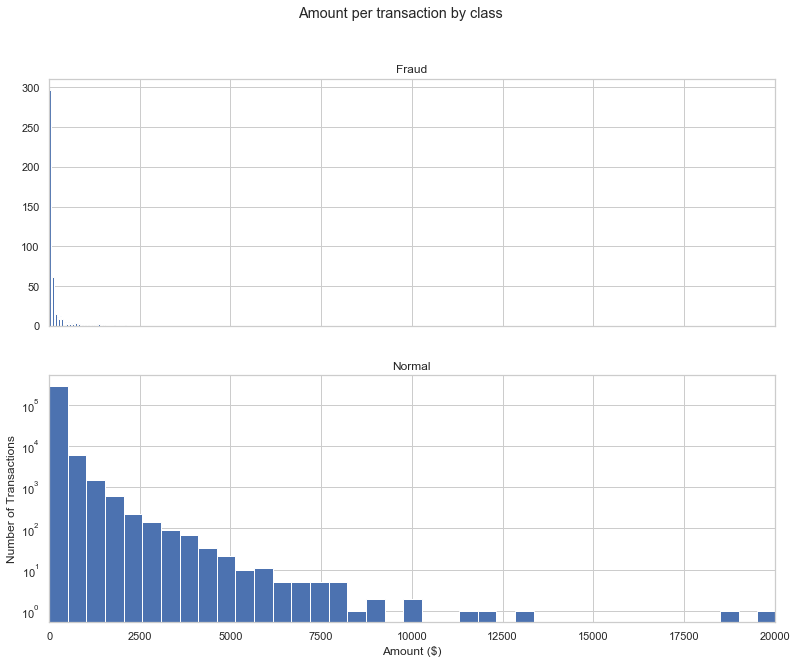

In [72]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(df[df['Class']==1]['Amount'], bins = 50)
ax1.set_title('Fraud')
ax2.hist(df[df['Class']==0]['Amount'], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Fraudlent transactions are largely less than a thousand euros with most being in 0 to 500 bin.

#### Correlation

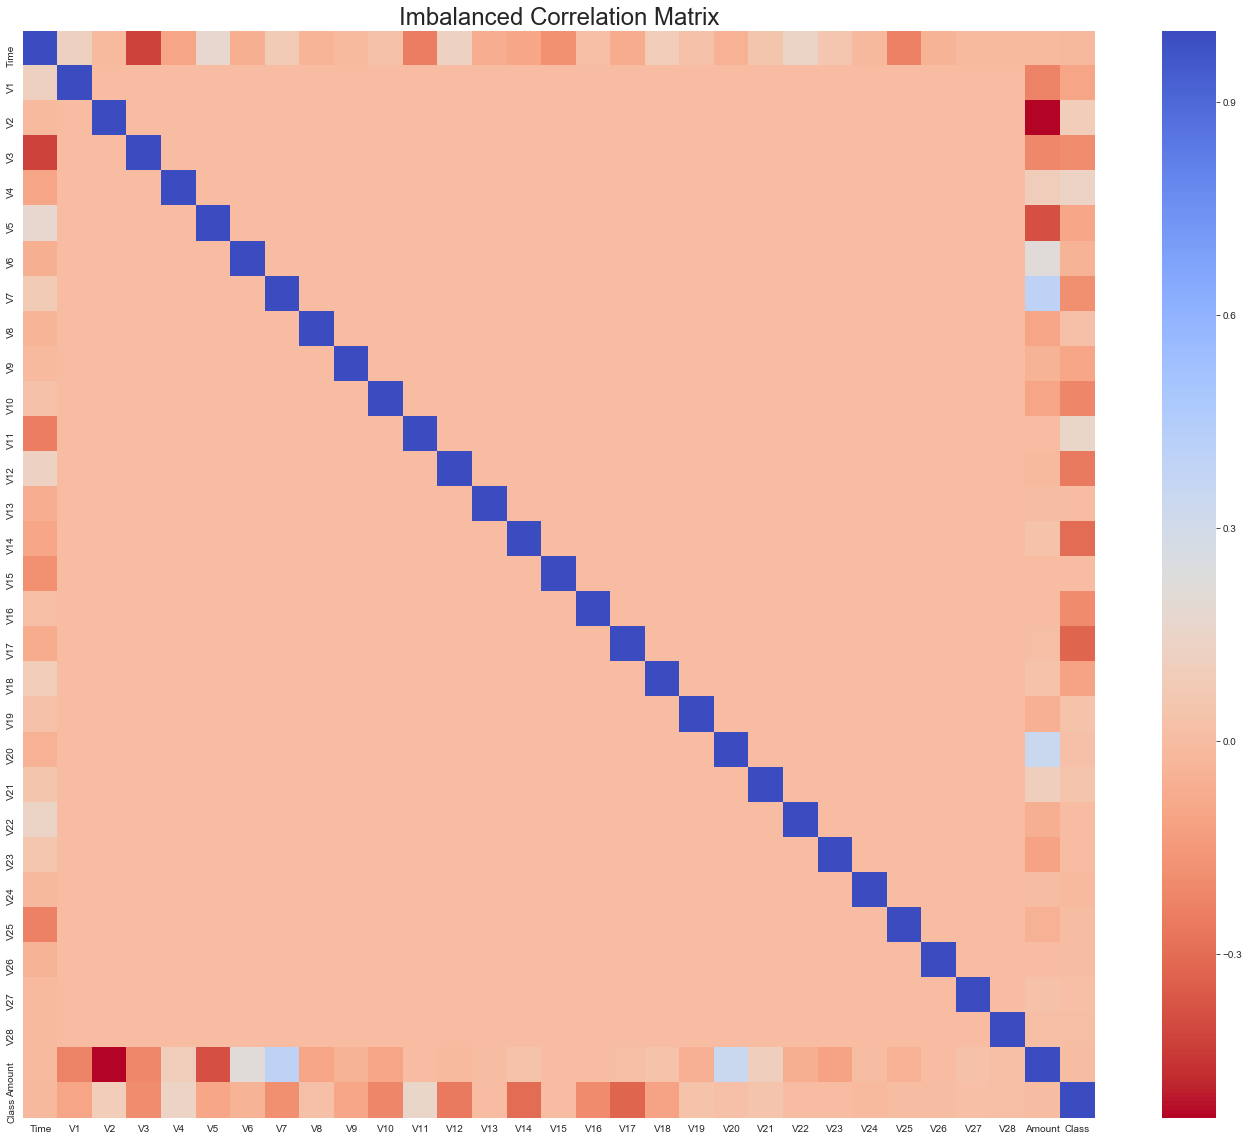

In [23]:
# Calculate pearson correlation coefficience
corr = df.corr() 

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix", fontsize=24)
plt.show()

#### Summary

- There is no correlation between scaled features V1 to V28 PCA components
- Class has some form positive and negative correlations with the V components e.g (+ve in V14, V17) but has no correlation 
with Time and Amount

- Negative correlation between V2,V5 and Amount.

- Positive correlation between V7, V20 and Amount.

## K-Means

Objective behind k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

### Remove Class Label From Dataset as it's unsupervised
Remove the class label to ensure we have unlabeled data

In [83]:
# Dependent Variable
class_label = df['Class']

# Independent Variables
df_features = df.drop(['Class'], axis=1)
df_features.head()

# Determine Number Of Fraud Cases In DataSet
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]


### Determine optimal number of K clusters using Elbow method used. 

Train multiple models using a different number of clusters and storing the value of the intertia_ property every time.

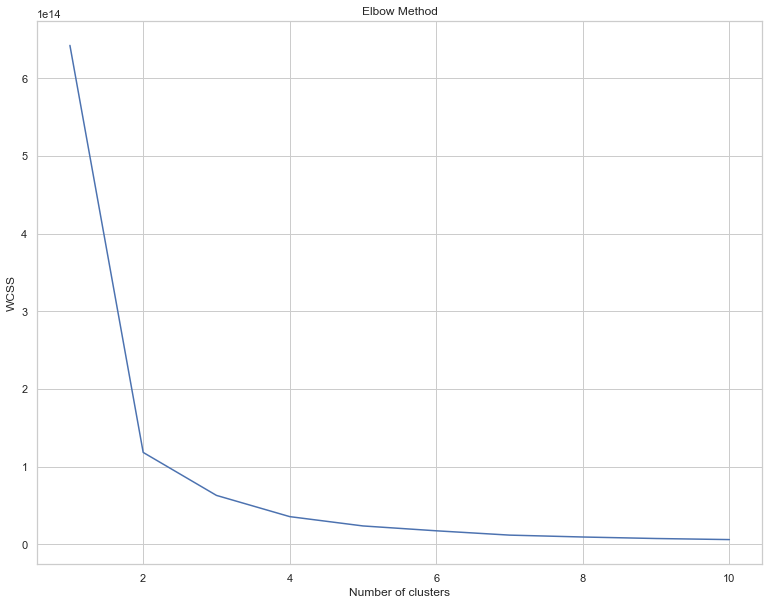

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of k is 2.

Anyway, we want to cluster the dataset into fraud and non fraud so clusters will be 2.

### Baseline KNN

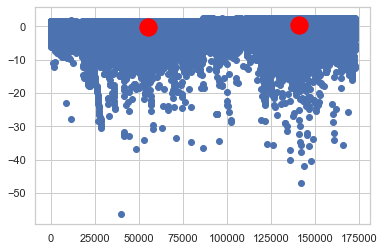

In [96]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
pred_y = kmeans.fit_predict(df_features) #fit_predict

#Categorize the data using the optimum number of clusters
plt.scatter(df_features.iloc[:,0], df_features.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [90]:
#Calculate correct prediction
correct = 0
for i in range(len(class_label)):
    if pred_y[i] == class_label[i] and pred_y[i] ==1:
        correct += 1
print("Correct: ", correct, " Fraud", len(Fraud))
print(correct/len(Fraud))

Correct:  162  Fraud 492
0.32926829268292684


In [117]:
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(class_label,pred_y))
# Scoring kmeans
print('kmeans_precison_score:', precision_score(class_label,pred_y))
print('kmeans_recall_score:', recall_score(class_label,pred_y))
print('kmeans_accuracy_score:', accuracy_score(class_label,pred_y))
print('kmeans_f1_score:',f1_score(class_label,pred_y))

Confusion Matrix:
 [[152833 131482]
 [   330    162]]
kmeans_precison_score: 0.0012305915955151774
kmeans_recall_score: 0.32926829268292684
kmeans_accuracy_score: 0.5371883415786831
kmeans_f1_score: 0.0024520191318035964


### Kmeans using Test Split

Split the data into test and train at 30, 70 ratio

In [106]:
# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Class'],axis=1).values
labels_train = pd.DataFrame(train[['Class']]).values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Class'],axis=1).values # Test with time removed as well
labels_test = pd.DataFrame(test[["Class"]]).values

# # Normalize the features in both train and test dataset
# features_train = normalize(features_train)
# features_test = normalize(features_test)

Model and Prediction

In [172]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

Metrics

In [112]:
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))
# Scoring kmeans
print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[45843 39453]
 [   97    50]]
kmeans_precison_score: 0.001265726653671873
kmeans_recall_score: 0.3401360544217687
kmeans_accuracy_score: 0.5371183127933242
kmeans_f1_score: 0.0025220680958385876


## Anomaly detection

Applied anomaly detection technique to identify unusual patterns that do not conform to expected behavior i.e  fraud detection in credit card transactions

Point anomaly Detecting credit card fraud based on "amount spent."

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles.



Anomaly detection using Isolation Forest

In [176]:
# Determine Number Of Fraud Cases In DataSet
outlier_fraction = len(Fraud) / float(len(Valid)) ## i.e 0.0017%

#Create Isolation Forest Model
clf = IsolationForest(max_samples = len(features_train),contamination = outlier_fraction,random_state = None)

clf.fit(features_train)
labels_test_predicted = clf.predict(features_test)

In [177]:
#Check the output. -1 is fraud, 1 is valid transaction
np.unique(labels_test_predicted)

array([-1,  1])

In [178]:
# Reshape The Prediction Values To 0 For Valid and 1 For Fraud
labels_test_predicted[labels_test_predicted == 1] = 0
labels_test_predicted[labels_test_predicted == -1] = 1

In [179]:
correct = 0
# Determine Number Of Fraud Cases In Test DataSet
df_labels_test = pd.DataFrame(labels_test, columns=["Class"])
Fraud = df_labels_test[df_labels_test['Class'] == 1]
Valid = df_labels_test[df_labels_test['Class'] == 0]

for i in range(len(labels_test)):
    if pred_y[i] == labels_test[i] and labels_test_predicted[i] ==1:
        correct += 1
print("Correct: ", correct, " Fraud", len(Fraud))
print(correct/len(Fraud))

Correct:  88  Fraud 147
0.5986394557823129


In [180]:
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))
print(classification_report(labels_test, labels_test_predicted))

Confusion Matrix:
 [[85208    88]
 [   95    52]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.37      0.35      0.36       147

avg / total       1.00      1.00      1.00     85443



Isolation forest is able to identify 36% of the fraud transaction.

## Conclusion

Objective was to predict 95% of all fraudulent transactions before they occur. Using unsupervised methods, we are able to predict 36% of the transactions. Therebeing, we propose exploring of both unsupervised and supervised methods in fraud identification

## References

https://www.kaggle.com/pavansanagapati/anomaly-detection-credit-card-fraud-analysis

Kmeans , https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203 , read on 18 Mar 2019.